# Explore here

1) recopilación de datos
la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019.

In [1]:
import pandas as pd

#Recopila los datos del archivo csv
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

#Lee las tablas 
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
#Se guarda archivo en ./data/raw

data.to_csv("../data/raw/datos_Airbnb.csv")

2) Exploración y limpieza de datos

In [3]:
#Obtener las dimensiones 
data.shape

#Tenemos 48895 filas con 16 columnas 

(48895, 16)

In [4]:
#Revisa los datos y sus tipos  
data.info()

#Nos da varios NaN en : last_review y reviews_per_month . Toda variable que no cumpla con el total de los datos (48895) tiene NaN
#Division:
    #Categorico: id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365
    #Numerico: latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Revisa los duplicados 

print(f"ID {data['id'].duplicated().sum()}")
print(f"Name {data['name'].duplicated().sum()}")
print(f"Host ID {data['host_id'].duplicated().sum()}")

#No hay duplicados segun nos da por la variable data['id']


ID 0
Name 989
Host ID 11438


In [6]:
#Se elimina datos irrelevante
data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


3)  Análisis de variables univariadas

/tmp/ipykernel_55683/2670936244.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=90) #rotar los valore del eje X


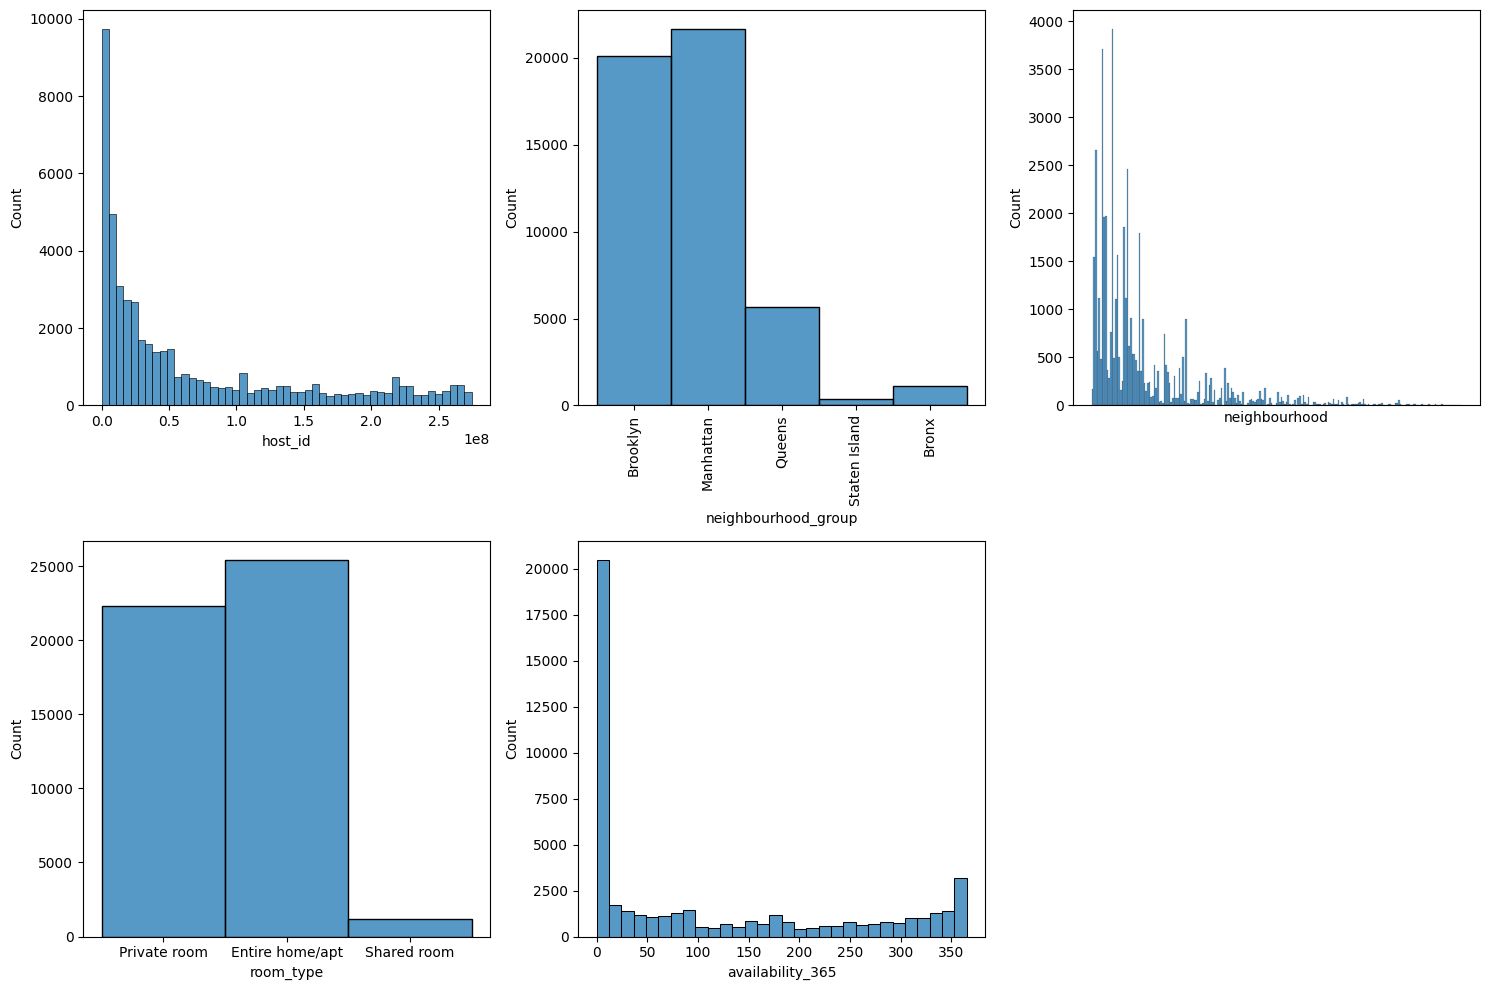

In [7]:
# Analisis variables categoricas 
# host_id, neighbourhood_group, neighbourhood, room_type y availability_365

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(15, 10))

# Creacion del histograma 
sns.histplot(ax = axis[0,0], data = data, x = "host_id")
sns.histplot(ax = axis[0,1], data = data, x = "neighbourhood_group")
axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=90) #rotar los valore del eje X

sns.histplot(ax = axis[0,2], data = data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data, x = "room_type")
sns.histplot(ax = axis[1,1], data = data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Ajustar layout
plt.tight_layout()

# mostrar grafico 
plt.show()

# Observamos 
#Host_id : existen varios NA 
#neighbourhood_group : Observamos 5 grupos de vecindarios , donde manhattan y brooklyn presentan una mayor cantidad de alquiler de viviendas en Nueva York
#room_type: tenemos 3 tipos (cuarto privado, casa completa y cuarto compartido), la que mayor cantidad de registro tiene es casa completa y cuarto privado.
#availability_365 : Observamos varios registros en 0 . Mientras que existen datos que demuestra que hay varios alquileres disponibles durante el año 

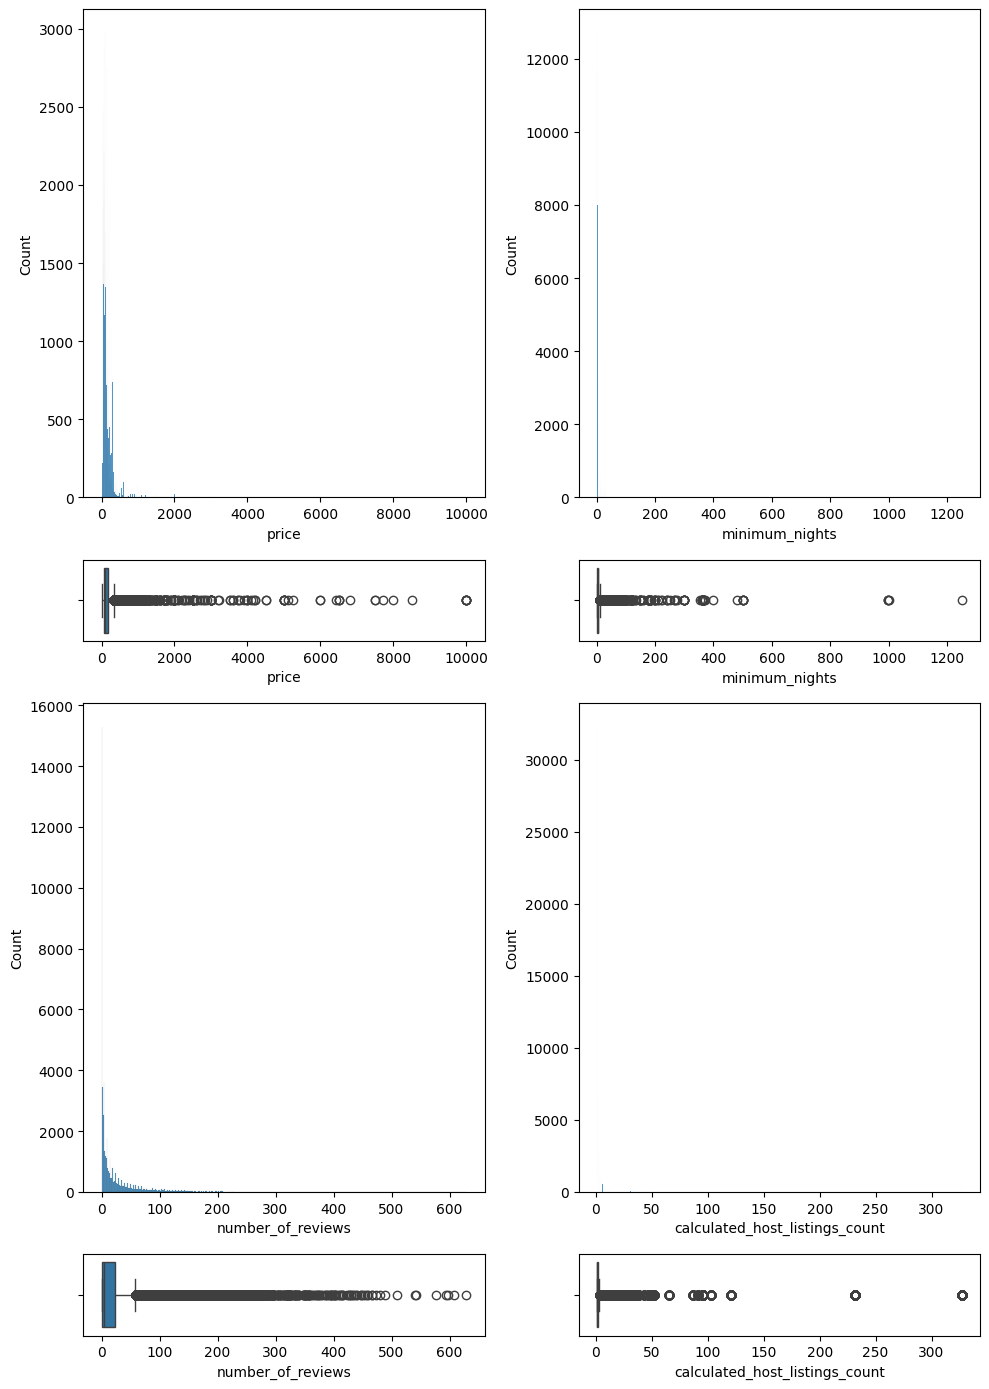

In [8]:
#Análisis sobre variables numéricas
#Variables Numericas :latitude, longitude, price, minimum_nights, number_of_reviews, calculated_host_listings_count
#No es necesario graficar latitude y longitude

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "price")
sns.boxplot(ax = axis[1, 0], data = data, x = "price")

sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = data, x = "calculated_host_listings_count")

# Austar layout
plt.tight_layout()

# Mostrar graficos 
plt.show()

#Observamos: Muchos datos disperos , siendo atípicos que están lejos de la distribución estándar y que sus distribuciones son asimétricos

4) Análisis de variables multivariadas

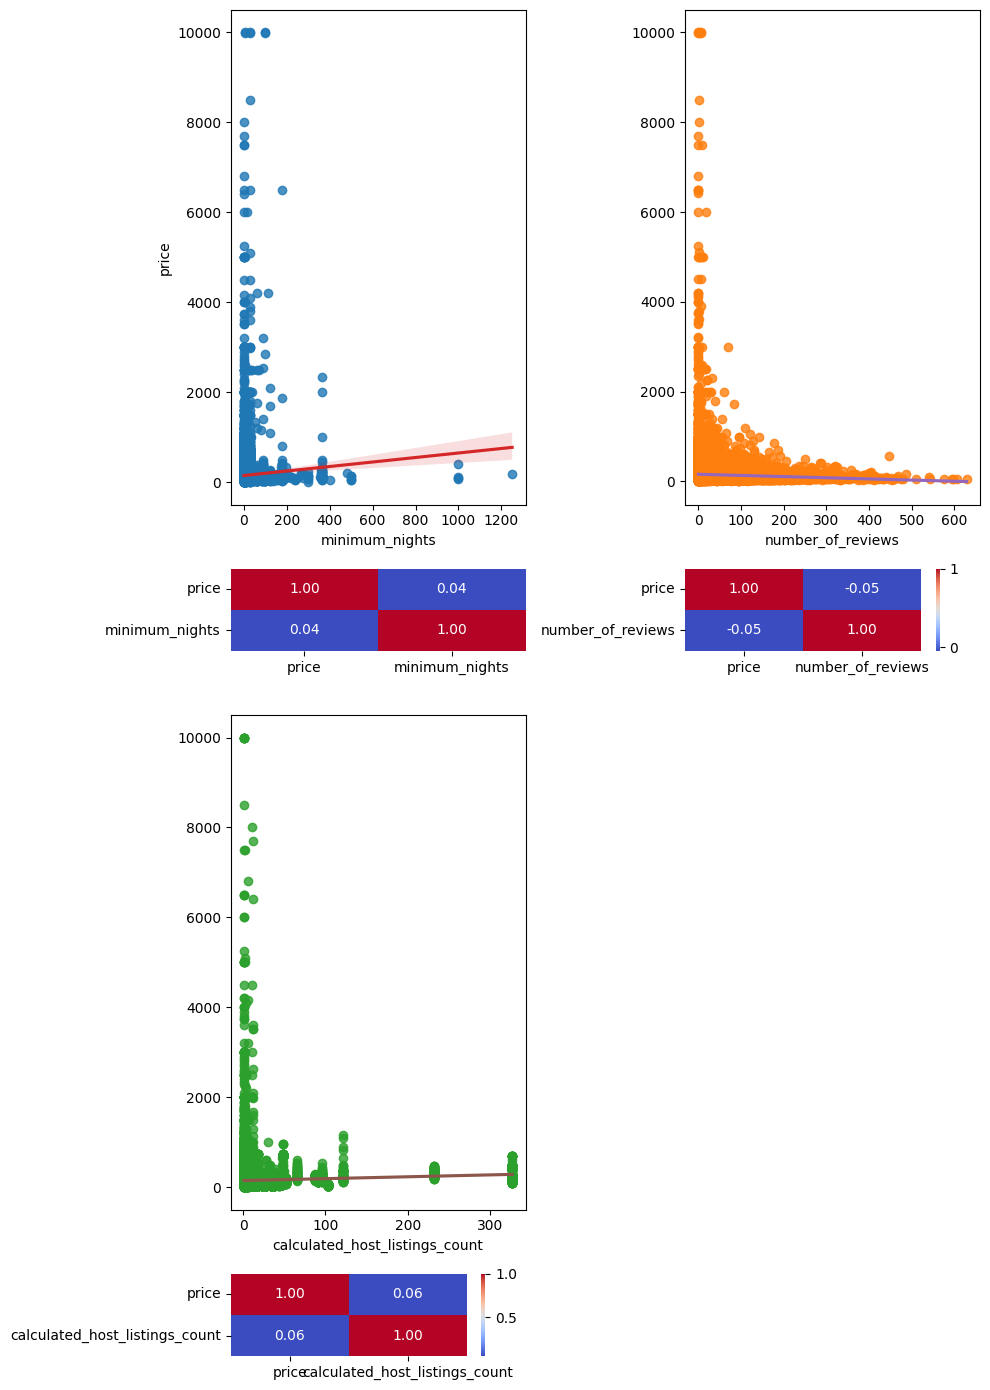

In [9]:
#Análisis numérico-numérico

# Crear la figura y ejes
fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Crear los gráficos de regresión con colores asignados directamente
sns.regplot(ax=axis[0, 0], data=data, x="minimum_nights", y="price", 
            scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#d62728'})
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False, cmap='coolwarm')

sns.regplot(ax=axis[0, 1], data=data, x="number_of_reviews", y="price", 
            scatter_kws={'color': '#ff7f0e'}, line_kws={'color': '#9467bd'}).set(ylabel=None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cmap='coolwarm')

sns.regplot(ax=axis[2, 0], data=data, x="calculated_host_listings_count", y="price", 
            scatter_kws={'color': '#2ca02c'}, line_kws={'color': '#8c564b'}).set(ylabel=None)
sns.heatmap(data[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cmap='coolwarm').set(ylabel=None)

# Eliminar ejes vacíos
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Observamos 
# No existe relación entre el precio y el número mínimo de noches
# No existe relación entre el número de reseñas y el precio

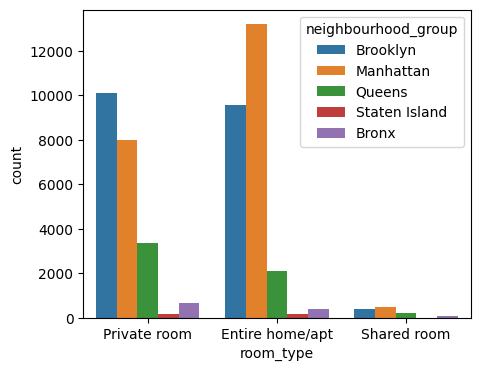

In [10]:
# Analisis categorico categorico 

fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data, x = "room_type", hue = "neighbourhood_group")

# Muestra el grafico 
plt.show()

#Observamos:
# Notamos que de nuestros 3 grupos de alquiler . Manhattan tiene mayor dominancia en departamentos enteros y en segundo lugar esta Brooklyn 
# Brooklyn tiene mas registros en habitaciones privadas 
# Los tipos de alquiler que dominan son las habitaciones privadas y los departamentos completos 
# El grupo de poblacion que casi no tiene registros es Staten Island 

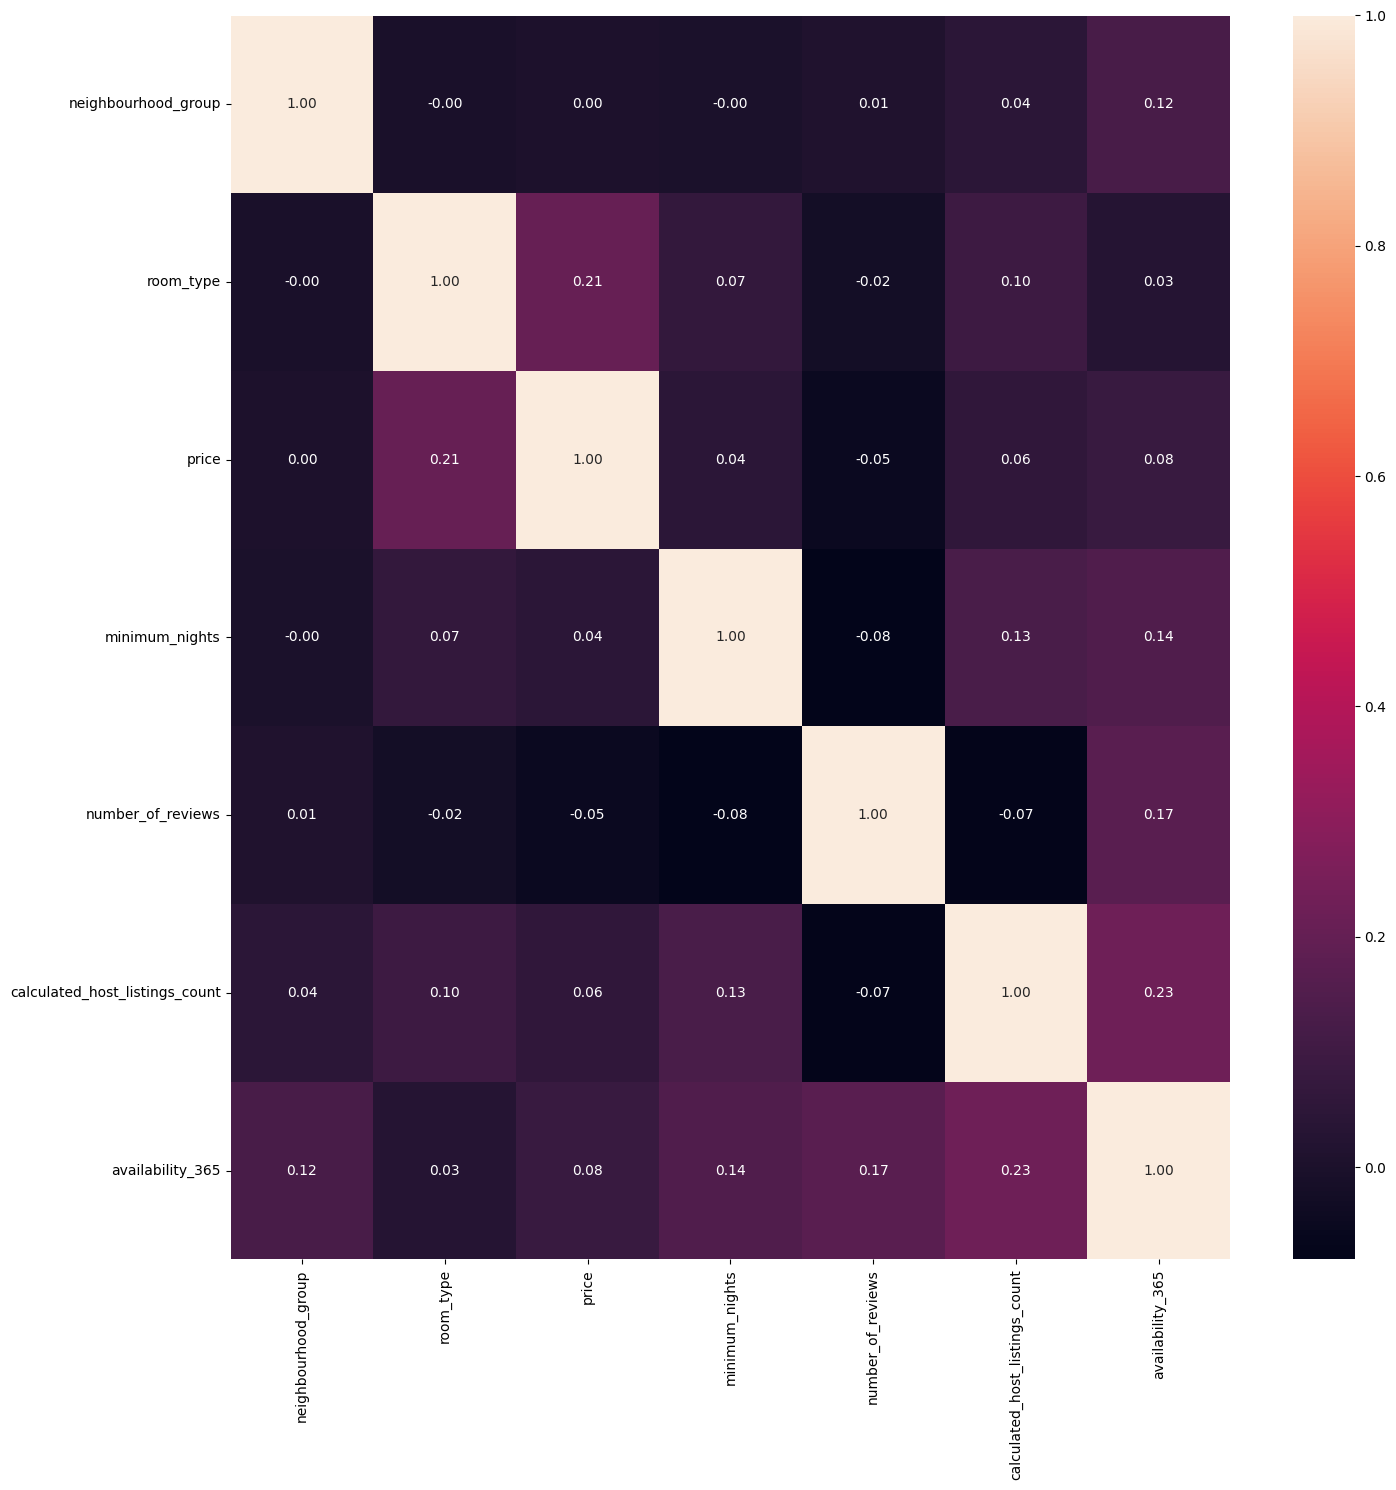

In [11]:
#Analisis numerico categorico 

#El objetivo del código es crear un heatmap de correlación que muestre la relación entre diferentes variables del dataset.
#El cálculo de correlación entre columnas numéricas es posible, pero no entre texto y números. Al factorizar las columnas categóricas, se convierten en variables numéricas que pueden ser correlacionadas con otras variables numéricas como el precio, número de noches, disponibilidadEl objetivo del código es crear un heatmap de correlación que muestre la relación entre diferentes variables del dataset.
#El cálculo de correlación entre columnas numéricas es posible, pero no entre texto y números. Al factorizar las columnas categóricas, se convierten en variables numéricas que pueden ser correlacionadas con otras variables numéricas como el precio, número de noches, disponibilidad

# Factorizacion 
data["room_type"] = pd.factorize(data["room_type"])[0]
data["neighbourhood_group"] = pd.factorize(data["neighbourhood_group"])[0]


fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data[["neighbourhood_group", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Muestra el grafico
plt.show()

#Observamos 
# Existe una relacion entre el precio y el room_type 0.23
# Los que tienen mas anuncios tienen mas disponibilidad 0.17

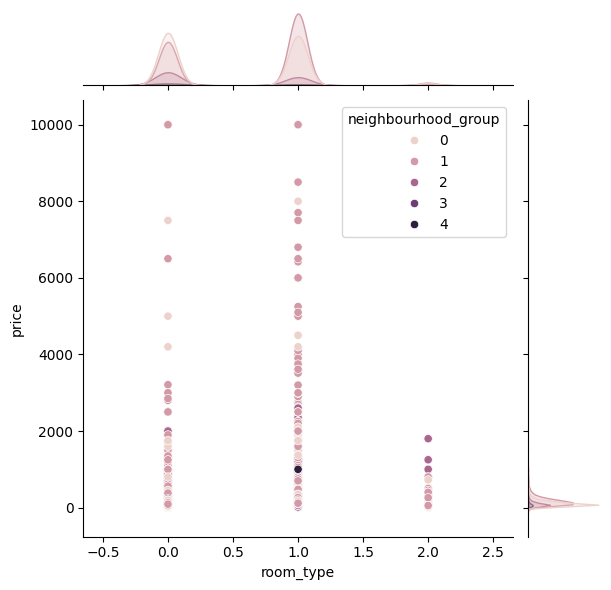

: 

In [12]:
# joint plot
sns.jointplot(data=data, x = 'room_type', y = 'price', hue = 'neighbourhood_group')

In [13]:
#Analisis de todos los datos 

sns.pairplot(data = data)

5) Ingeniería de funciones

In [13]:
#Análisis de valores atípicos

data.describe()

# Vemos los valores maximos y minimos , nuestros cuartiles (Q2 la mediana) , la media y desviacion estandar 

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


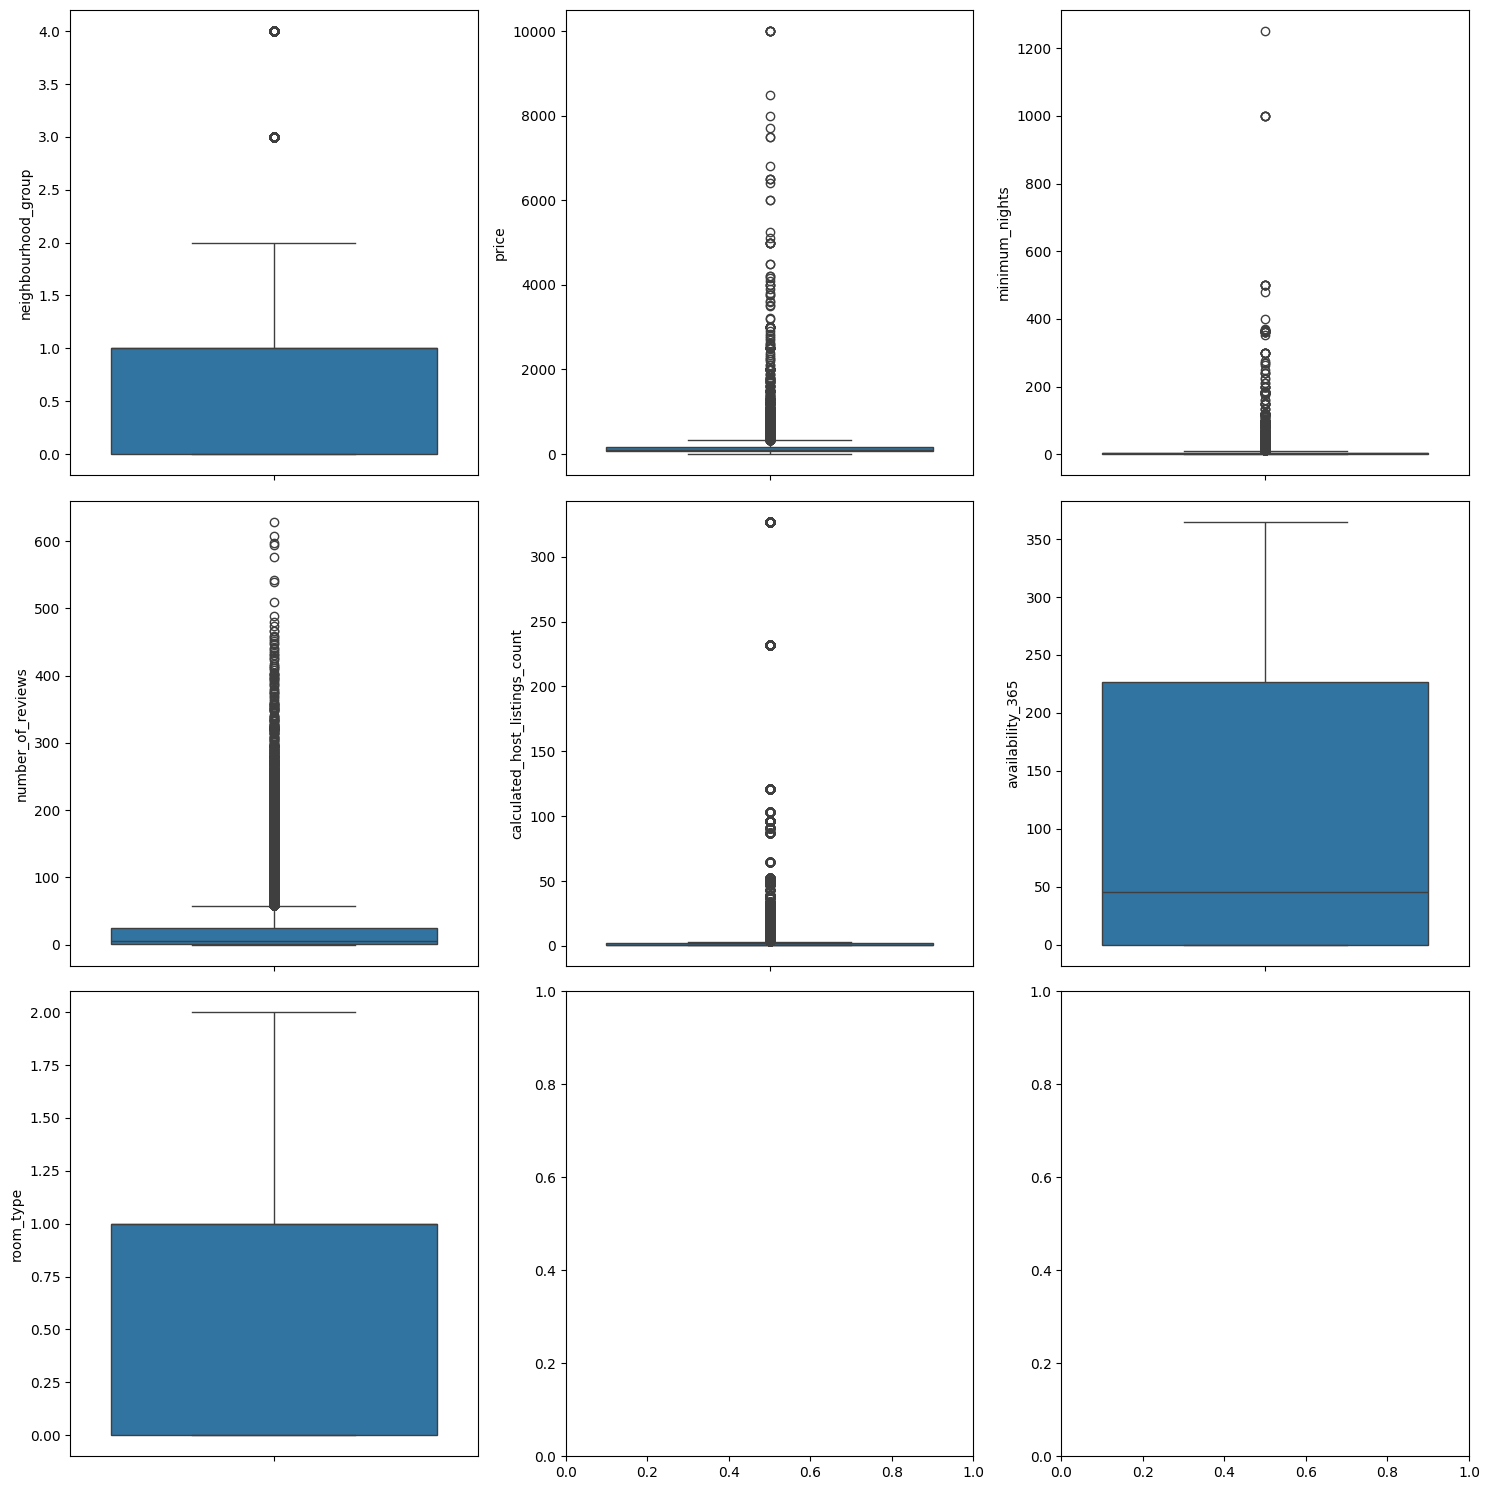

In [14]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = data, y = "price")
sns.boxplot(ax = axes[0, 2], data = data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = data, y = "room_type")

plt.tight_layout()

plt.show()

# Observamos que tiene varios outliers, los mas afectados el price, minimum_nights, number_of_reviews ycalculated_host_listings_count
# se pueden hacer 3 cosas Mantenerlos, eliminarlos o reemplazarlos 

Limpiamos los outliers

In [15]:
#Limpiamos los outliers de price
#Primero revisamos los datos de price (Q, media , sdt)

price_des= data["price"].describe()

print(price_des)

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [16]:
# IQR de price 

price_iqr = price_des["75%"] - price_des["25%"]

upper_limit = price_des["75%"] + 1.5 * price_iqr
lower_limit = price_des["25%"] - 1.5 * price_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("price_iqr : ", price_iqr )


upper_limit :  334.0
lower_limit :  -90.0
price_iqr :  106.0


In [17]:
# Se limpia los outliers de price

data = data[data["price"] > 0]

In [18]:
#Limpiamos los outliers de minimum_nights
#Primero revisamos los datos de minimum_nights (Q, media , sdt)

nights_des = data["minimum_nights"].describe()

print(nights_des)

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


In [19]:
# IQR de minimum_nights 

nights_iqr = nights_des["75%"] - nights_des["25%"]

upper_limit = nights_des["75%"] + 1.5 * nights_iqr
lower_limit = nights_des["25%"] - 1.5 * nights_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("nights_iqr : ", nights_iqr)


upper_limit :  11.0
lower_limit :  -5.0
nights_iqr :  4.0


In [20]:
# Limpieza de outliers

data = data[(data["minimum_nights"] <= 11) & (data["minimum_nights"] >= -5)]

In [21]:
#Limpiamos los outliers de number_of_reviews
#Primero revisamos los datos de minimum_nights (Q, media , sdt)

review_des = data["number_of_reviews"].describe()
print(review_des)

count    42279.000000
mean        25.633577
std         46.683294
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64


In [22]:
# IQR for number_of_reviews

review_iqr = review_des["75%"] - review_des["25%"]

upper_limit = review_des["75%"] + 1.5 * review_iqr
lower_limit = review_des["25%"] - 1.5 * review_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("review_iqr : ", review_iqr)

upper_limit :  66.0
lower_limit :  -38.0
review_iqr :  26.0


In [23]:
#calculated_host_listings_count
hostlist_des = data["calculated_host_listings_count"].describe()
print(hostlist_des)

count    42279.000000
mean         3.392346
std         21.961834
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


In [24]:
# IQR for calculated_host_listings_count

hostlist_iqr = hostlist_des["75%"] - hostlist_des["25%"]

upper_limit = hostlist_des["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_des["25%"] - 1.5 * hostlist_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("hostlist_iqr : ", hostlist_iqr)

upper_limit :  3.5
lower_limit :  -0.5
hostlist_iqr :  1.0


In [27]:
# Limpieza de outliers

data = data[data["calculated_host_listings_count"] < 4]

Análisis de valor faltante

In [28]:
data.isnull().sum().sort_values(ascending = False)

# Refleja que no tiene datos nulos 

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

: 

Escalado de funciones